# Uso de KNN en dataset de Titanic

Primeramente se importan las librerias a utilizar para el ejercicio

In [129]:
import numpy as np
import pandas as pd
import math
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

Se importa el dataset en formato csv con la librería pandas y se descartan los atributos no relevantes para la predicción. Verificamos imprimiento los primeros datos

In [130]:
df = pd.read_csv("Titanic-Dataset.csv")
df = df.drop(['Name','PassengerId','Ticket','Cabin','Embarked'],axis = 1) 
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


Se inicia la parte de preprocesamiento de datos en donde primeramente se van a codificar de forma numérica las categorías en de atributos que lo requieran.

In [131]:
if df is not None:
    numerical_mapping = {'male': 0, 'female': 1}
    # La asignación directa elimina la necesidad de 'inplace=True' y resuelve la advertencia.
    df['Sex'] = df['Sex'].replace(numerical_mapping)
    print(df[['Sex']].head())

   Sex
0    0
1    1
2    1
3    1
4    0


/tmp/ipykernel_95936/2809991603.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Sex'] = df['Sex'].replace(numerical_mapping)


## Imputación de datos
Se verifica si hay datos faltantes

In [132]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
dtype: int64

Una vez verificados cuales son los datos faltantes que en este caso fueron los de edad graficamos los datos originales sin los faltantes para comparar con van a tener una imputación.

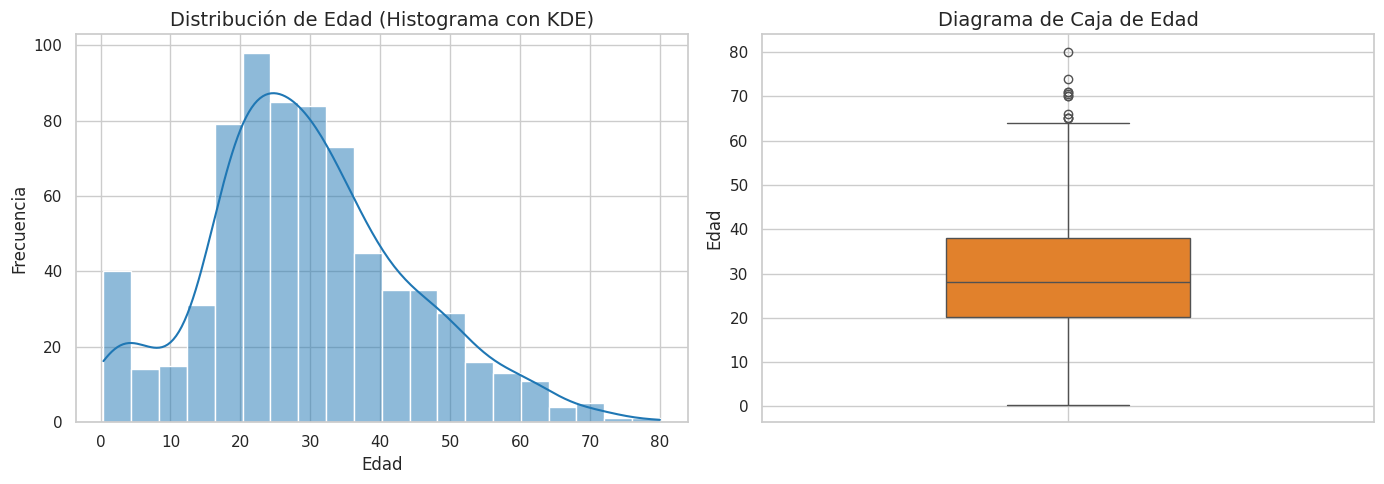

In [133]:
age_original = df['Age'].dropna()

# 2. Configurar el estilo de Seaborn y el layout de Matplotlib
sns.set_theme(style="whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(14, 5)) # Aumentamos un poco el tamaño para mejor visualización

# --- GRÁFICA 1: HISTOGRAMA (Seaborn histplot) ---
sns.histplot(
    data=age_original, 
    ax=axes[0], 
    kde=True,  # Añadir la estimación de densidad del kernel para suavizar
    bins=20,
    color="#1f77b4" # Color azul por defecto de Matplotlib/Seaborn
)
axes[0].set_title('Distribución de Edad (Histograma con KDE)', fontsize=14)
axes[0].set_xlabel('Edad', fontsize=12)
axes[0].set_ylabel('Frecuencia', fontsize=12)

# --- GRÁFICA 2: DIAGRAMA DE CAJA (Seaborn boxplot) ---
# Seaborn requiere que el argumento 'data' sea el DataFrame, no la Serie
# Como estamos usando solo una Serie, usamos 'y=datosAI'
sns.boxplot(
    y=age_original, 
    ax=axes[1], 
    color="#ff7f0e", # Color naranja de Seaborn
    width=0.4
)
axes[1].set_title('Diagrama de Caja de Edad', fontsize=14)
axes[1].set_ylabel('Edad', fontsize=12)
axes[1].set_xlabel('') # Eliminar la etiqueta 'Age' por defecto en el eje X
axes[1].grid(True)

# 3. Ajustar el layout y mostrar
plt.tight_layout()
plt.show()

Se realiza una imputación por media y se grafica

In [134]:
x = df['Age'].mean()
age_mean = df['Age'].fillna(x)

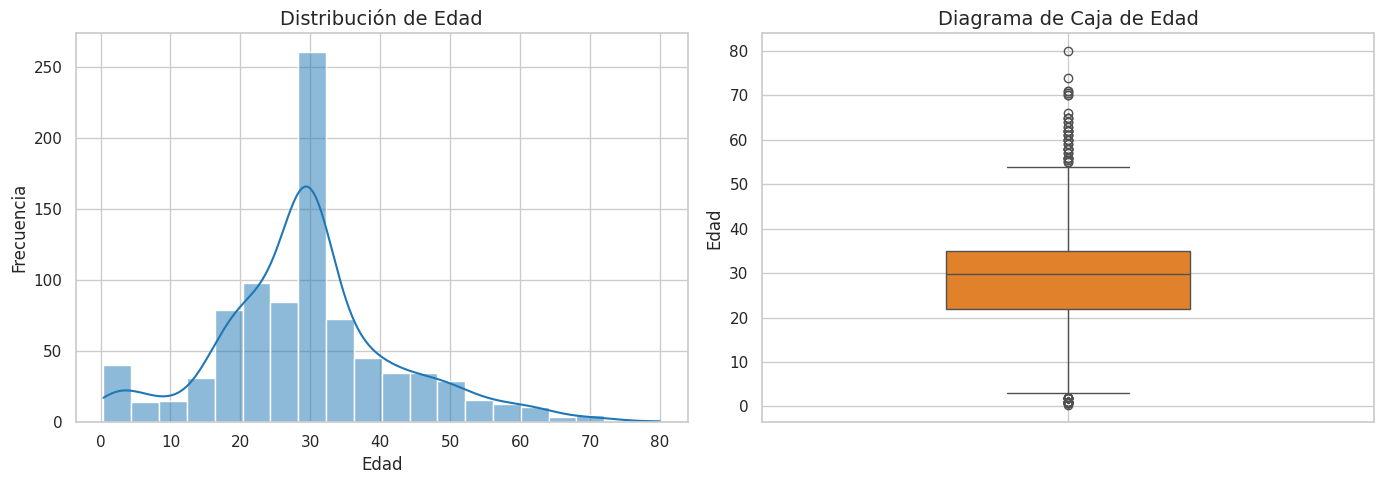

In [135]:
# Configurar el estilo de Seaborn y el layout de Matplotlib
sns.set_theme(style="whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(14, 5)) 

# --- GRÁFICA 1: HISTOGRAMA (Seaborn histplot) ---
sns.histplot(
    data=age_mean, 
    ax=axes[0], 
    kde=True,  
    bins=20,
    color="#1f77b4" 
)
axes[0].set_title('Distribución de Edad', fontsize=14)
axes[0].set_xlabel('Edad', fontsize=12)
axes[0].set_ylabel('Frecuencia', fontsize=12)

# --- GRÁFICA 2: DIAGRAMA DE CAJA (Seaborn boxplot) ---

sns.boxplot(
    y=age_mean, 
    ax=axes[1], 
    color="#ff7f0e",
    width=0.4
)
axes[1].set_title('Diagrama de Caja de Edad', fontsize=14)
axes[1].set_ylabel('Edad', fontsize=12)
axes[1].set_xlabel('') 
axes[1].grid(True)

plt.tight_layout()
plt.show()

Se realiza una imputación por hot-deck y se grafica

In [136]:
# --- Imputación Hot-Deck Aleatoria para 'Age' ---
# 1. Identificar los valores observados (el "deck")
age_hotDeck = df['Age']
observed_ages = df['Age'].dropna()

# 2. Identificar las filas con 'Age' faltante
age_missing_indices = df[df['Age'].isnull()].index

# 3. Realizar la imputación Hot-Deck
if len(age_missing_indices) > 0:
    # Elegir aleatoriamente de las edades observadas, con reemplazo
    imputed_ages = np.random.choice(
        observed_ages.values, 
        size=len(age_missing_indices), 
        replace=True
    )
    # Asignar las edades imputadas de vuelta al DataFrame en las posiciones nulas
    age_hotDeck[age_missing_indices] = imputed_ages

print("Hot-Deck Imputation applied to 'Age'.")

Hot-Deck Imputation applied to 'Age'.


/tmp/ipykernel_95936/258473952.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_hotDeck[age_missing_indices] = imputed_ages


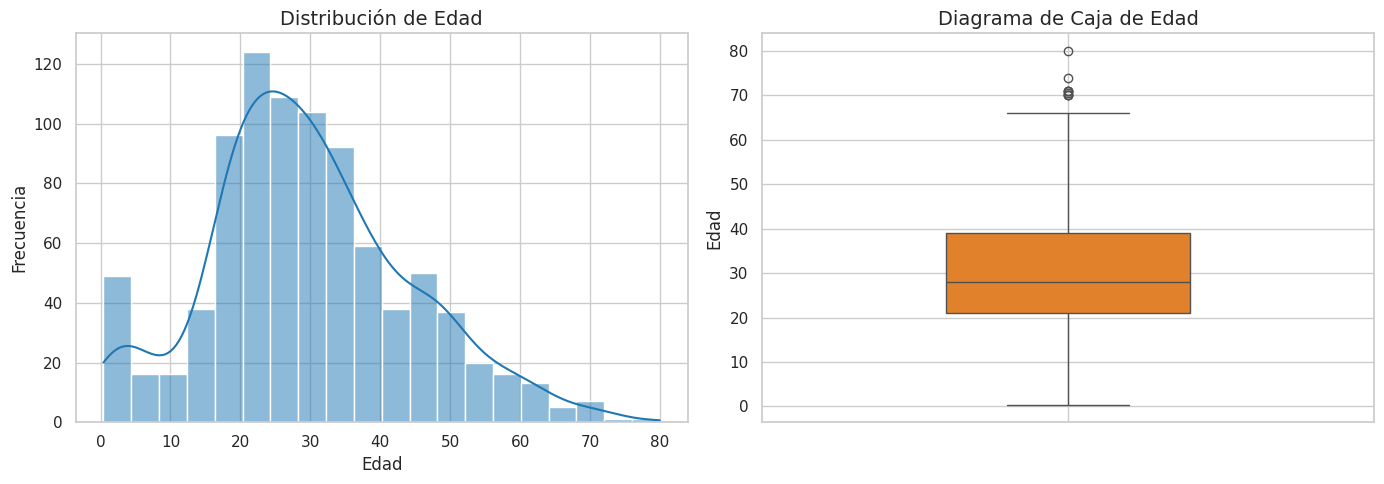

In [137]:
sns.set_theme(style="whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# --- GRÁFICA 1: HISTOGRAMA (Seaborn histplot) ---
sns.histplot(
    data=age_hotDeck, 
    ax=axes[0], 
    kde=True,  
    bins=20,
    color="#1f77b4" 
)
axes[0].set_title('Distribución de Edad', fontsize=14)
axes[0].set_xlabel('Edad', fontsize=12)
axes[0].set_ylabel('Frecuencia', fontsize=12)

# --- GRÁFICA 2: DIAGRAMA DE CAJA (Seaborn boxplot) ---

sns.boxplot(
    y=age_hotDeck, 
    ax=axes[1], 
    color="#ff7f0e",
    width=0.4
)
axes[1].set_title('Diagrama de Caja de Edad', fontsize=14)
axes[1].set_ylabel('Edad', fontsize=12)
axes[1].set_xlabel('') 
axes[1].grid(True)

# 3. Ajustar el layout y mostrar
plt.tight_layout()
plt.show()

Se comparan las gráficas de los métodos de imputación de media y hot-deck y ya que hot-deck tiene mayor parecido a los datos originales se utilizará hot-deck

In [138]:
# se utilizan la imputación realizada por hot-deck y se verifica
# no haya más datos faltantes en el dataset
df['Age'] = age_hotDeck
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

## Normalización

Se utiliza la normalización min-max

In [139]:
def normalize_dataframe(datos: pd.DataFrame) -> pd.DataFrame:
    """
    Normalizes a pandas DataFrame's numerical columns to the range [0, 1] 
    using Min-Max scaling.

    Parameters:
    datos (pd.DataFrame): The input DataFrame to be normalized.

    Returns:
    pd.DataFrame: A new DataFrame with the normalized data.
    """
    
    # Define the desired normalization range (as per the original code)
    minNorm = 0
    maxNorm = 1
    rangoNorm = maxNorm - minNorm # This equals 1

    # 1. Calculate Min, Max, and Range for all columns simultaneously
    # .min() and .max() are applied column-wise by default
    minDatos = datos.min()
    maxDatos = datos.max()
    rangoDatos = maxDatos - minDatos

    # Handle the case where the range is zero (i.e., all values are the same) 
    # to avoid division by zero. We'll set the range to 1 for these columns 
    # to ensure the normalized value is 0.
    # Note: A normalized value of 0 is correct when min=max, as the min value 
    # maps to minNorm (0), and max maps to maxNorm (1), but since they're equal, 
    # the normalized value should be constant (usually set to 0 or minNorm).
    rangoDatos_safe = rangoDatos.replace(0, 1)

    # 2. Apply the normalization formula vectorially
    # This replaces the nested loops efficiently:
    # Value_Norm = minNorm + ( (Value - Min) / Range ) * Rango_Norm
    
    datosNorm = minNorm + ( (datos - minDatos) / rangoDatos_safe ) * rangoNorm
    
    # Optional: For columns where the range was zero (all values were the same), 
    # the normalized values might be calculated as 0/1 * 1 = 0, which is correct.
    # However, if any NaNs resulted (which shouldn't happen with the .replace(0, 1)),
    # we could handle them here, but the vectorized approach should be clean.
    
    return datosNorm

In [140]:
#datos = df.drop(['Survived'], axis = 1)
datos = df.copy()

In [141]:
dat = normalize_dataframe(datos)
dat.head()
test = dat.drop(['Survived'], axis = 1)

In [142]:
type(df)

pandas.core.frame.DataFrame

### PCA  

Obtener matriz de covarianza y sus respectivos eigenvectores y eigenvalores 

In [143]:
def principal_component_analysis(X, n_components):
    """
    Realiza el Análisis de Componentes Principales (PCA) de forma customizada.
    
    Argumentos:
        X (np.ndarray): Matriz de datos de entrada (asumidos estar estandarizados).
        n_components (int): Número de componentes principales a mantener.
        
    Retorna:
        np.ndarray: Datos transformados con las primeras n_components.
        np.ndarray: Vectores propios (Eigenvectors) usados para la transformación.
        np.ndarray: Valores propios (Eigenvalues).
    """
    # 1. Calcular la matriz de covarianza
    # El DataFrame debe estar estandarizado para que la covarianza sea significativa
    cov_matrix = np.cov(X, rowvar=False) 

    # 2. Calcular los valores y vectores propios (Eigenvalues y Eigenvectors)
    # np.linalg.eig devuelve los valores y vectores propios.
    eigen_values, eigen_vectors = np.linalg.eig(cov_matrix)

    # 3. Ordenar los pares (valor propio, vector propio)
    # Ordenar los valores propios de mayor a menor y obtener los índices de ordenación
    idx = eigen_values.argsort()[::-1]
    eigen_values = eigen_values[idx]
    eigen_vectors = eigen_vectors[:, idx]

    # 4. Seleccionar los n_components principales
    # Se seleccionan los primeros 'n_components' vectores propios (Eigenvectors)
    # Estos vectores forman la matriz de proyección P.
    projection_matrix = eigen_vectors[:, :n_components]

    # 5. Transformar los datos al nuevo espacio dimensional
    # Proyección: Datos_Transformados = Datos_Originales . Matriz_Proyección
    X_transformed = X.dot(projection_matrix)

    return X_transformed, projection_matrix, eigen_values

In [144]:
X_transformed, projection_matrix, eigen_values = principal_component_analysis(test, 6)
print(eigen_values)

[0.24151064 0.17050458 0.03196803 0.02233047 0.01062213 0.00564999]


In [145]:
#Obtener el porcentaje de covarianza de cada uno de los atributos
total = eigen_values.sum()
p = (eigen_values/total)*100
p

array([50.04511591, 35.33145066,  6.62432019,  4.62725391,  2.20108545,
        1.17077389])

Al obtener el porcentaje de covarianza que cada uno de los atributos aporta se puede determinar que únicamente utilizando Pclass, Gender y Age se puede obtener un poco más del 90% de covarianza al cual nos ayuda a limitar a los atributos relevantes para el entrenamiento.

###  Datos de entrenamiento y prueba  

In [146]:
feature_cols = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex']
X = dat[feature_cols].values.astype(float)
y = dat['Survived'].values
np.random.seed(42)
indices = np.random.permutation(len(X))
test_size = int(0.20 * len(X))

test_indices = indices[:test_size]
train_indices = indices[test_size:]

X_train, X_test = X[train_indices], X[test_indices]
y_train, y_test = y[train_indices], y[test_indices]

In [147]:
def euc_distance(p1: np.ndarray, p2: np.ndarray) -> float:
    """Calculates the Euclidean distance between two vectors."""
    # Calculates sqrt(sum((p1 - p2)^2))
    return np.sqrt(np.sum((p1 - p2) ** 2))

In [148]:
def knn_model(X_train: np.ndarray, y_train: np.ndarray, X_test: np.ndarray, k_nn: int) -> list[int]:
    
    if not (1 <= k_nn <= len(X_train)):
        raise ValueError(f"k_nn (k={k_nn}) must be between 1 and the size of the training set ({len(X_train)}).")
        
    y_pred = []
    
    
    for test_point in X_test:
        distances = []
        
        
        for i in range(len(X_train)):
            dist = euc_distance(test_point, X_train[i])
            distances.append((dist, y_train[i]))
            
        
        distances.sort(key=lambda x: x[0])
        
        
        k_neighbors = distances[0:k_nn]
        k_neighbor_labels = [label for dist, label in k_neighbors]
        
        
        most_common = Counter(k_neighbor_labels).most_common(1)
        
        
        predicted_label = most_common[0][0]
        y_pred.append(predicted_label)
        
    return y_pred

In [149]:
def metrics(y_pred: np.ndarray, y_true: np.ndarray) -> tuple[float, float, float, float]:
    """
    Calculates Accuracy, Precision, Recall, and F1-Score (Exactitud, Precisión, Sensitividad).
    Includes robust division-by-zero handling.
    """
    TP, FP, FN, TN = 0, 0, 0, 0
    y_pred = np.array(y_pred) 
    
    for i in range(len(y_true)):
        if y_true[i] == 1 and y_pred[i] == 1:
            TP += 1
        elif y_true[i] == 0 and y_pred[i] == 1:
            FP += 1
        elif y_true[i] == 1 and y_pred[i] == 0:
            FN += 1
        elif y_true[i] == 0 and y_pred[i] == 0:
            TN += 1

    # Accuracy (Exactitud)
    accuracy = (TP + TN) / len(y_true)

    # Precision (Precisión) - Handle Division by Zero
    precision_denominator = TP + FP
    precision = TP / precision_denominator if precision_denominator > 0 else 0.0

    # Recall (Sensitividad) - Handle Division by Zero
    recall_denominator = TP + FN
    recall = TP / recall_denominator if recall_denominator > 0 else 0.0

    # F1 Score - Handle Division by Zero
    f1_denominator = precision + recall
    f1_score = 2 * (precision * recall) / f1_denominator if f1_denominator > 0 else 0.0

    return accuracy, precision, recall, f1_score

In [150]:
K_VALUE = 9 
print(f"--- Running KNN Model with K={K_VALUE} ---")

y_pred = knn_model(X_train, y_train, X_test, K_VALUE)

accuracy, precision, recall, f1_score = metrics(y_pred, y_test)
        
print("\n--- Evaluación del modelo ---")
print(f"Exactitud (Accuracy): {accuracy:.4f}")
print(f"Precisión (Precision): {precision:.4f}")
print(f"Sensitividad (Recall): {recall:.4f}")
print(f"F1 Score: {f1_score:.4f}")

--- Running KNN Model with K=9 ---



--- Evaluación del modelo ---
Exactitud (Accuracy): 0.7921
Precisión (Precision): 0.7812
Sensitividad (Recall): 0.6849
F1 Score: 0.7299


### Clasificación de sobrevivientes utilizando todos los atributos

Calculating Error Rate for K values from 1 to 40...


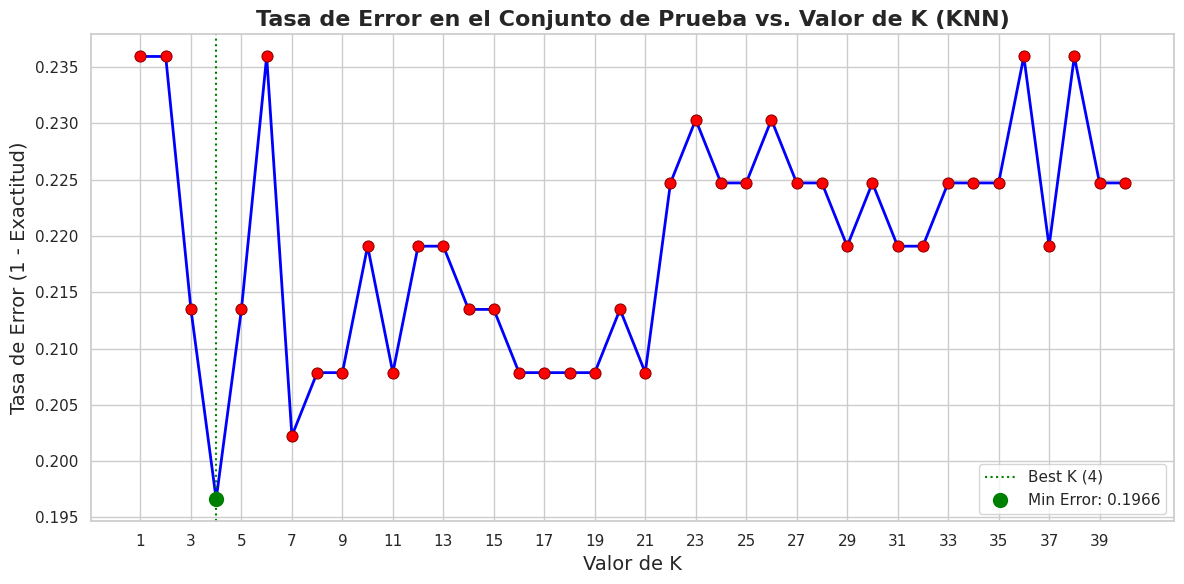

In [151]:
# 1. Setup K Range and Initialization
error_rate = []


max_k = min(40, len(X_train)) 
k_values_to_test = range(1, max_k + 1)
y_test_arr = y_test

print(f"Calculating Error Rate for K values from 1 to {max_k}...")

for k in k_values_to_test:
    
    try:
        y_pred_test = knn_model(X_train, y_train, X_test, k)
        
        
        accuracy, _, _, _ = metrics(y_pred_test, y_test_arr)
        
        
        error_rate.append(1 - accuracy)
        
    except ValueError as e:
        
        print(f"Stopping K iteration at k={k}: {e}")
        k_values_to_test = list(range(1, k)) 
        break
        

if len(error_rate) < len(k_values_to_test):
    k_values_to_test = k_values_to_test[:len(error_rate)]


sns.set_theme(style="whitegrid")

plt.figure(figsize=(12, 6))

sns.lineplot(
    x=k_values_to_test, 
    y=error_rate, 
    color='blue', 
    linestyle='-', 
    linewidth=2,
    marker='o',
    markersize=8,
    markeredgecolor='darkred',
    markerfacecolor='red' 
)

min_error = min(error_rate)
best_k = k_values_to_test[np.argmin(error_rate)]
min_error_index = np.argmin(error_rate)

plt.axvline(x=best_k, color='green', linestyle=':', linewidth=1.5, label=f'Best K ({best_k})')
plt.scatter(best_k, min_error, color='green', s=100, zorder=5, label=f'Min Error: {min_error:.4f}')

plt.title('Tasa de Error en el Conjunto de Prueba vs. Valor de K (KNN)', fontsize=16, fontweight='bold')
plt.xlabel('Valor de K', fontsize=14)
plt.ylabel('Tasa de Error (1 - Exactitud)', fontsize=14)

plt.xticks(np.arange(min(k_values_to_test), max(k_values_to_test)+1, step=2)) 
plt.legend()
plt.tight_layout()
plt.show()

Escojo un valor de k=7 debido a que es el número impar con mejor tasa de error.

In [152]:
K_VALUE = 7
print(f"--- Running KNN Model with K={K_VALUE} ---")

y_pred = knn_model(X_train, y_train, X_test, K_VALUE)

accuracy, precision, recall, f1_score = metrics(y_pred, y_test)
        
print("\n--- Evaluación del modelo ---")
print(f"Exactitud (Accuracy): {accuracy:.4f}")
print(f"Precisión (Precision): {precision:.4f}")
print(f"Sensitividad (Recall): {recall:.4f}")
print(f"F1 Score: {f1_score:.4f}")

--- Running KNN Model with K=7 ---

--- Evaluación del modelo ---
Exactitud (Accuracy): 0.7978
Precisión (Precision): 0.7846
Sensitividad (Recall): 0.6986
F1 Score: 0.7391


## Clasificación únicamente utilizando Pclass, Gender y Age 

In [153]:
feature_cols = ['Pclass', 'Age','Sex']
X_n = dat[feature_cols].values.astype(float)
y_n = dat['Survived'].values
np.random.seed(42)
indices_n = np.random.permutation(len(X))
test_size_n = int(0.20 * len(X))

test_indices_n = indices[:test_size]
train_indices_n = indices[test_size:]

X_train_n, X_test_n = X[train_indices_n], X[test_indices_n]
y_train_n, y_test_n = y[train_indices_n], y[test_indices_n]

Calculating Error Rate for K values from 1 to 40...


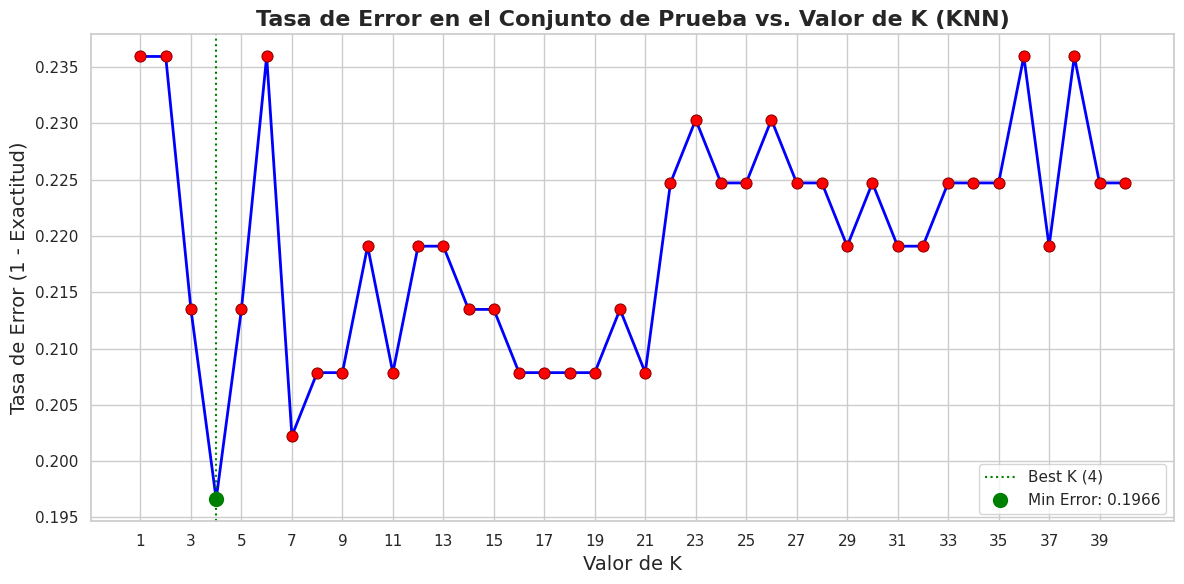

In [154]:

error_rate = []


max_k = min(40, len(X_train_n)) 
k_values_to_test = range(1, max_k + 1)
y_test_arr = y_test_n 

print(f"Calculating Error Rate for K values from 1 to {max_k}...")

for k in k_values_to_test:
    
    try:
        y_pred_test = knn_model(X_train_n, y_train_n, X_test_n, k)
        
        
        accuracy, _, _, _ = metrics(y_pred_test, y_test_arr)
        
        error_rate.append(1 - accuracy)
        
    except ValueError as e:
        
        print(f"Stopping K iteration at k={k}: {e}")
        k_values_to_test = list(range(1, k)) 
        break
        

if len(error_rate) < len(k_values_to_test):
    k_values_to_test = k_values_to_test[:len(error_rate)]


sns.set_theme(style="whitegrid")

plt.figure(figsize=(12, 6))

sns.lineplot(
    x=k_values_to_test, 
    y=error_rate, 
    color='blue', 
    linestyle='-', 
    linewidth=2,
    marker='o',
    markersize=8,
    markeredgecolor='darkred',
    markerfacecolor='red' 
)

min_error = min(error_rate)
best_k = k_values_to_test[np.argmin(error_rate)]
min_error_index = np.argmin(error_rate)

plt.axvline(x=best_k, color='green', linestyle=':', linewidth=1.5, label=f'Best K ({best_k})')
plt.scatter(best_k, min_error, color='green', s=100, zorder=5, label=f'Min Error: {min_error:.4f}')

plt.title('Tasa de Error en el Conjunto de Prueba vs. Valor de K (KNN)', fontsize=16, fontweight='bold')
plt.xlabel('Valor de K', fontsize=14)
plt.ylabel('Tasa de Error (1 - Exactitud)', fontsize=14)

plt.xticks(np.arange(min(k_values_to_test), max(k_values_to_test)+1, step=2)) 
plt.legend()
plt.tight_layout()
plt.show()

In [155]:
K_VALUE = 7 
print(f"--- Running KNN Model with K={K_VALUE} ---")

y_pred = knn_model(X_train_n, y_train_n, X_test_n, K_VALUE)

accuracy, precision, recall, f1_score = metrics(y_pred, y_test_n)
        
print("\n--- Evaluación del modelo ---")
print(f"Exactitud (Accuracy): {accuracy:.4f}")
print(f"Precisión (Precision): {precision:.4f}")
print(f"Sensitividad (Recall): {recall:.4f}")
print(f"F1 Score: {f1_score:.4f}")

--- Running KNN Model with K=7 ---

--- Evaluación del modelo ---
Exactitud (Accuracy): 0.7978
Precisión (Precision): 0.7846
Sensitividad (Recall): 0.6986
F1 Score: 0.7391


Utilizando únicamente 3 atributos se obtiene una tasa de error cercana a la que se obtuvo anteriormente con mayor número de atributos.